In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [53]:
data_train_path = "C:\\Users\\gedda\\Downloads\\Fruits_Vegetables\\Fruits_Vegetables\\train"
data_test_path = "C:\\Users\\gedda\\Downloads\\Fruits_Vegetables\\Fruits_Vegetables\\test"
data_val_path = "C:\\Users\\gedda\\Downloads\\Fruits_Vegetables\\Fruits_Vegetables\\validation"

In [54]:
img_width = 180
img_height =180 

In [55]:
training = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 3115 files belonging to 36 classes.


In [56]:
classes = training.class_names

In [57]:
print(classes)

['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']


In [58]:
validation = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 351 files belonging to 36 classes.


In [59]:
testing = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 359 files belonging to 36 classes.


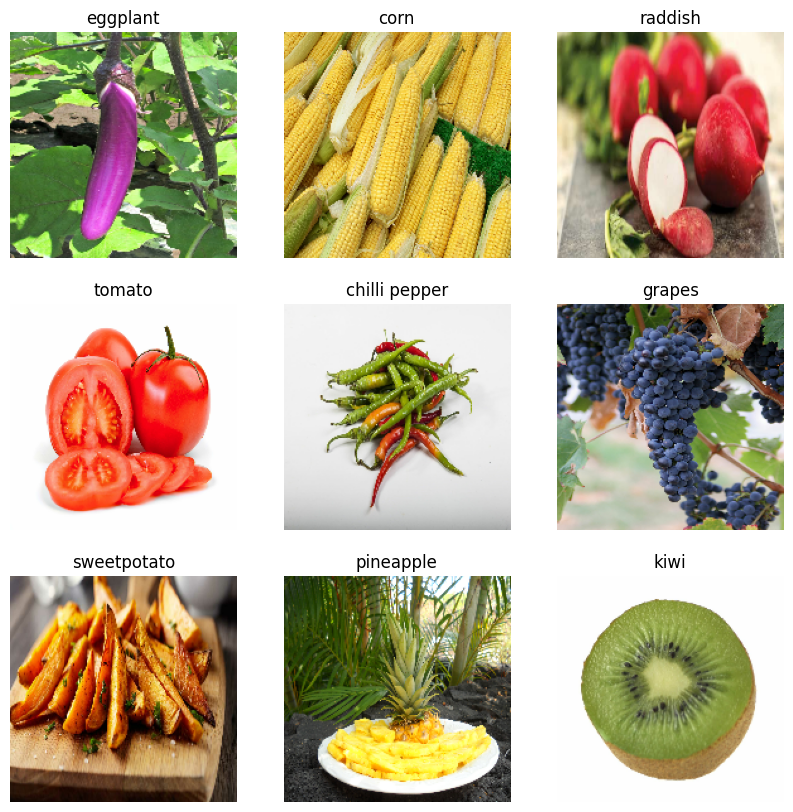

In [60]:
plt.figure(figsize=(10,10))
for image, labels in training.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(classes[labels[i]])
        plt.axis('off')

In [61]:
from tensorflow.keras.models import Sequential

In [62]:
print(training)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [63]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(classes))               
])

In [65]:
model.compile(
    optimizer='adam', 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [66]:
history = model.fit(training, validation_data = validation, epochs = 25)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 15s 141ms/step - accuracy: 0.0644 - loss: 4.3837 - val_accuracy: 0.3846 - val_loss: 2.3517
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 15s 155ms/step - accuracy: 0.2632 - loss: 2.6177 - val_accuracy: 0.5356 - val_loss: 1.6982
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 17s 170ms/step - accuracy: 0.3900 - loss: 2.1527 - val_accuracy: 0.6980 - val_loss: 1.1546
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 20s 202ms/step - accuracy: 0.5589 - loss: 1.5693 - val_accuracy: 0.8547 - val_loss: 0.6487
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 18s 182ms/step - accuracy: 0.7142 - loss: 1.0193 - val_accuracy: 0.8832 - val_loss: 0.4972
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 17s 169ms/step - accuracy: 0.8032 - loss: 0.6966 - val_accuracy: 0.9174 - val_loss: 0.4351
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 17s 171ms/step - accuracy: 0.8603 - loss: 0.4666 - val_accuracy: 0.9430 - val_loss: 0.3586
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 17s 172ms/step - accuracy: 0.8982 - loss: 0.3989 - val_accu

Text(0.5, 1.0, 'Loss')

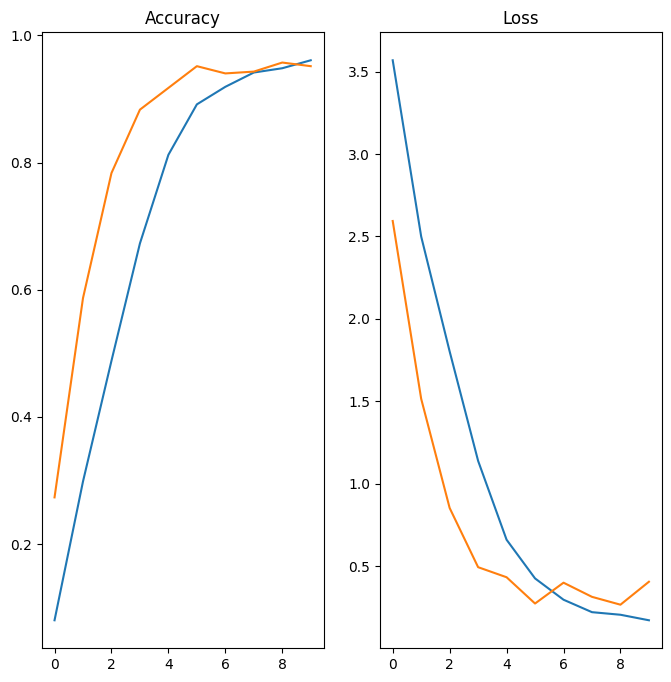

In [29]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [69]:
image = "C:\\Users\\gedda\\Downloads\\Fruits_Vegetables\\Fruits_Vegetables\\test\\corn\\Image_1.jpg"
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [70]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


In [71]:
score = tf.nn.softmax(predict)

In [72]:
classes[np.argmax(score)]

'corn'

In [73]:
np.max(score)

0.9906